In [1]:
import numpy as np 
import pandas as pd
import time
import random

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

%matplotlib inline


import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, mean_squared_error, accuracy_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.decomposition import PCA

2024-04-30 13:04:04.736842: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Preprocessing

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
df = pd.DataFrame(wine.data.original)

#set seeds to get reproducible results
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
# Calculate variance of each feature within each class
variance_by_class = df.groupby('class').var()

# Display variance of each feature within each class
print("Variance of each feature within each class:")
variance_by_class

Variance of each feature within each class:


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
class,,,,,,,,,,,,,
1,0.213560,0.474100,0.051604,6.483758,110.227937,0.114895,0.158001,0.004907,0.169834,1.534063,0.013568,0.127504,49071.450029
2,0.289406,1.031380,0.099520,11.220962,280.679678,0.297419,0.498014,0.015366,0.362486,0.855494,0.041183,0.246585,24715.367807
3,0.281156,1.183539,0.034110,5.099291,118.602394,0.127428,0.086145,0.015411,0.167147,5.340454,0.013097,0.074045,13247.329344


In [4]:
# Calculate variance of each feature within each class
mean_by_class = df.groupby('class').mean()

# Display variance of each feature within each class
print("Mean of each feature within each class:")
mean_by_class

Mean of each feature within each class:


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
class,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [5]:
# Calculate mean variance across classes for each feature
mean_variance = variance_by_class.mean()
mean_variance

Alcohol                             0.261374
Malicacid                           0.896339
Ash                                 0.061745
Alcalinity_of_ash                   7.601337
Magnesium                         169.836670
Total_phenols                       0.179914
Flavanoids                          0.247386
Nonflavanoid_phenols                0.011895
Proanthocyanins                     0.233155
Color_intensity                     2.576670
Hue                                 0.022616
0D280_0D315_of_diluted_wines        0.149378
Proline                         29011.382393
dtype: float64

In [6]:
# Find features with highest mean variance
features_with_highest_variance = mean_variance.nlargest(3).index
features_with_highest_variance

Index(['Proline', 'Magnesium', 'Alcalinity_of_ash'], dtype='object')

In [7]:
def preprocessor(df):
    """
    Preprocesses the dataset by encoding categorical features using LabelEncoder

    Args:
        df (pandas.DataFrame): Input dataset

    Returns:
        pandas.DataFrame: Processed dataset with encoded categorical features
    """
    # make a copy of the original dataframe to avoid modifying the original data
    res_df = df.copy()
    
    # initialize LabelEncoder
    le = preprocessing.LabelEncoder()
    
    # encode categorical features using LabelEncoder
    res_df['Alcohol'] = le.fit_transform(res_df['Alcohol'])
    res_df['Malicacid'] = le.fit_transform(res_df['Malicacid'])
    res_df['Ash'] = le.fit_transform(res_df['Ash'])
    res_df['Alcalinity_of_ash'] = le.fit_transform(res_df['Alcalinity_of_ash'])
    res_df['Magnesium'] = le.fit_transform(res_df['Magnesium'])
    res_df['Total_phenols'] = le.fit_transform(res_df['Total_phenols'])
    res_df['Flavanoids'] = le.fit_transform(res_df['Flavanoids'])
    res_df['Nonflavanoid_phenols'] = le.fit_transform(res_df['Nonflavanoid_phenols'])
    res_df['Proanthocyanins'] = le.fit_transform(res_df['Proanthocyanins'])
    res_df['Color_intensity'] = le.fit_transform(res_df['Color_intensity'])
    res_df['0D280_0D315_of_diluted_wines'] = le.fit_transform(res_df['0D280_0D315_of_diluted_wines'])
    res_df['Hue'] = le.fit_transform(res_df['Hue'])
    res_df['Proline'] = le.fit_transform(res_df['Proline'])
    res_df['class'] = le.fit_transform(res_df['class'])
    
    # Return the processed dataframe
    return res_df

# Run the preprocessor function on the desired dataset
encoded_df = preprocessor(df)

# Model Formulation

Below, you'll find a class named KMeansClustering, which embodies the algorithm outlined in the folder's README. For a user-defined value of k, it initializes k random points as the initial centroids. Subsequently, it computes the distances between each feature vector and each centroid, thereby assigning each data point to its closest centroid. The algorithm iteratively refines the clusters by updating centroids and reassigning data points until it reaches the maximum specified number of iterations.

In [24]:
class KMeansClustering:
    """A class for performing K-Means Clustering."""

    def __init__(self, num_clusters=3, max_iterations=1000, epsilon=0.01):
        """
        Initialize the KMeansClustering object.

        Parameters:
        - num_clusters (int): The number of clusters to create.
        - max_iterations (int): The maximum number of iterations for the algorithm.
        - epsilon (float): The convergence threshold.

        Returns:
        None
        """
        self.data = None
        self.num_clusters = num_clusters
        self.max_iterations = max_iterations
        self.epsilon = epsilon
        self.centroid_history = None
        self.final_centroids = None
        self.mse_per_iteration = []  # List to store MSE values per iteration

    def fit(self, data):
        """
        Fit the KMeansClustering model to the given data.

        Parameters:
        - data (array-like): The input data to cluster.

        Returns:
        None
        """
        self.data = data
        initial_centroids = self.initialize_centroids()
        new_centroids = self.update_centroids(initial_centroids)
        self.centroid_history = [initial_centroids, new_centroids]

        iteration = 0
        while iteration < self.max_iterations:
            print(iteration)
            initial_centroids = new_centroids
            new_centroids = self.update_centroids(new_centroids)
            self.centroid_history.append(new_centroids)

            if self.convergence(initial_centroids, new_centroids):
                print("CONVERGENCE ACHEIVED")
                break

            iteration += 1
            
            self.final_centroids = new_centroids
            
            mse = self.mean_squared_error()
            self.mse_per_iteration.append(mse)
            
        else:
            raise ConvergenceError()


    def initialize_centroids(self):
        """
        Initialize the centroids randomly from the data.

        Returns:
        List: The initial centroids.
        """
        centroids = []
        for _ in range(self.num_clusters):
            random_index = np.random.randint(len(self.data))
            centroids.append(self.data[random_index, :])
        return centroids

    def update_centroids(self, centroids):
        """
        Update the centroids based on the assigned clusters.

        Parameters:
        - centroids (list): The current centroids.

        Returns:
        List: The updated centroids.
        """
        new_centroids = []
        clusters = self.assign_clusters(centroids)
        
        for cluster in clusters:
            if len(cluster) > 0:
                centroid = np.mean(cluster, axis=0)
                new_centroids.append(centroid)
        return new_centroids

    def assign_clusters(self, centroids):
        """
        Assign data points to the nearest centroids.

        Parameters:
        - centroids (list): The current centroids.

        Returns:
        List: The clusters containing data points.
        """
        clusters = [[] for _ in range(self.num_clusters)]
        
        for point in self.data:
            distances = [np.linalg.norm(point - centroid) for centroid in centroids]
            closest_cluster_index = np.argmin(distances)
            clusters[closest_cluster_index].append(point)
        
        return clusters

    def convergence(self, old_centroids, new_centroids):
        """
        Check for convergence by comparing old and new centroids.

        Parameters:
        - old_centroids (list): The old centroids.
        - new_centroids (list): The new centroids.

        Returns:
        bool: True if convergence is achieved, False otherwise.
        """
        distances = [np.linalg.norm(old - new) for old, new in zip(old_centroids, new_centroids)]
        return max(distances) < self.epsilon

    def predict(self, data):
        """
        Predict the cluster labels for the given data.

        Parameters:
        - data (array-like): The input data.

        Returns:
        array-like: The predicted cluster labels.
        """
        clusters = self.assign_clusters(self.final_centroids)
        predictions = [None] * len(data)

        for i, cluster in enumerate(clusters):
            for point in cluster:
                index = np.where((data == point).all(axis=1))[0][0]
                predictions[index] = i
        return np.array(predictions)

    def mean_squared_error(self):
        """
        Calculate the mean squared error for the final clusters.

        Returns:
        float: The mean squared error.
        """
        errors = []
        clusters = self.assign_clusters(self.final_centroids)

        for cluster in clusters:
            centroid = np.mean(cluster, axis=0)
            error = sum(0.5 * np.linalg.norm(centroid - point) ** 2 for point in cluster) / len(cluster)
            errors.append(error)

        return sum(errors)

# Implementation

In [25]:
X = np.asarray(encoded_df[['Proline', 'Magnesium', 'Alcalinity_of_ash']])

In [26]:
# Initialize and fit the KMeansClustering model
kmeans = KMeansClustering(num_clusters=3)

kmeans.fit(X)

# Get the final centroids
final_centroids = kmeans.final_centroids
print("Final Centroids:")
print(final_centroids)

# Predict the cluster labels for the data
cluster_labels = kmeans.predict(X)
print("Cluster Labels:")
print(cluster_labels)

# Calculate the mean squared error for the final clusters
mse = kmeans.mean_squared_error()
print("Mean Squared Error:", mse)

0
1
2
3
4
5
6
7
CONVERGENCE ACHEIVED
Final Centroids:
[array([53.42622951, 18.62295082, 42.70491803]), array([94.3125  , 28.328125, 22.96875 ]), array([21.        , 11.79245283, 39.20754717])]
Cluster Labels:
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 1 1 1 2 2 1
 1 2 2 2 1 2 2 0 0 2 2 2 2 0 0 0 2 2 2 2 2 1 0 2 0 2 0 0 2 2 0 2 2 2 2 0 0
 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0
 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 0 2 2 0 0 0 1 1 0]
Mean Squared Error: 614.7144850451514


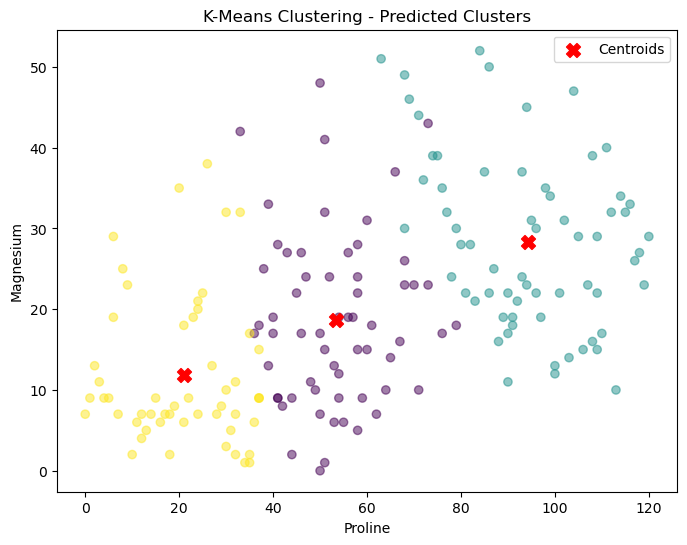

In [27]:
# Convert final centroids to a NumPy array
final_centroids = np.array(final_centroids)

# Plot the data points with colors representing the predicted clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.title('K-Means Clustering - Predicted Clusters')
plt.xlabel('Proline')
plt.ylabel('Magnesium')
plt.legend()
plt.show()

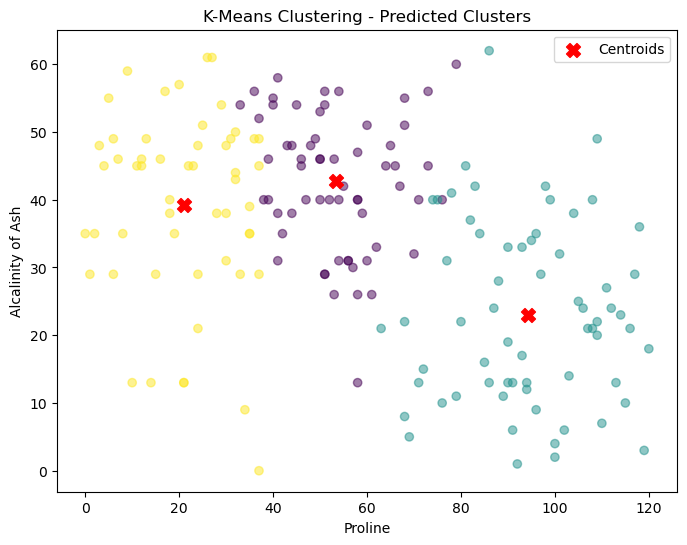

In [28]:
# Plot the data points with colors representing the predicted clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 2], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(final_centroids[:, 0], final_centroids[:, 2], marker='X', color='red', s=100, label='Centroids')
plt.title('K-Means Clustering - Predicted Clusters')
plt.xlabel('Proline')
plt.ylabel('Alcalinity of Ash')
plt.legend()
plt.show()

[619.9122994641817, 617.6564414982553, 619.9746730026636, 617.624202734375, 615.5853034753248, 614.7144850451514, 614.7144850451514]


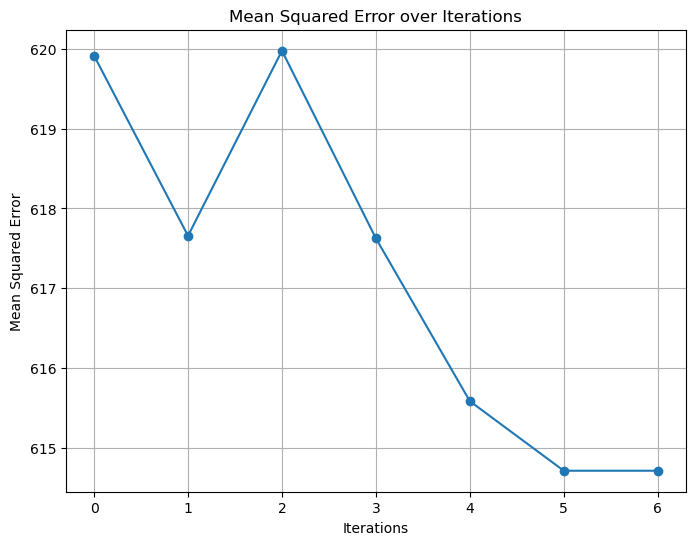

In [29]:
# Line plot showing the change in mean squared error over iterations
print(kmeans.mse_per_iteration)
plt.figure(figsize=(8, 6))
plt.plot(range(len(kmeans.mse_per_iteration)), kmeans.mse_per_iteration, marker='o')
plt.title('Mean Squared Error over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [30]:
def k_means_compare(k_max, max_iter, epsilon):
    """
    Compare K-Means clustering results for different values of k.

    Parameters:
    - k_max (int): Maximum number of clusters to compare.
    - max_iter (int): Maximum number of iterations for K-Means algorithm.
    - epsilon (float): Convergence threshold.

    Returns:
    None
    """
    mse_list = []  # Initialize a list to store MSE values for different k

    # Loop through different values of k
    for k in range(2, k_max):
        # Instantiate and fit the K-Means clustering model
        k_means = KMeansClustering(k, max_iter, epsilon)
        k_means.fit(X)
        
        mse = k_means.mean_squared_error()  # Calculate MSE for the current k
        mse_list.append(mse)  # Append the MSE to the list
        
        # Calculate MSE for each iteration and plot
        plt.plot(range(len(k_means.mse_per_iteration)), k_means.mse_per_iteration, marker='o')
        plt.title(f'{k} Clusters')  # Set title for the plot
        plt.xlabel('Iteration')  # Set label for x-axis
        plt.ylabel('MSE')  # Set label for y-axis
        plt.show()  # Display the plot
        
        # Print MSE for the current k
        print("MSE for", k, "clusters:", round(mse, 3))
        print("")
        
    # Plot MSE over the values of k to determine the best k
    plt.plot(range(2, k_max), mse_list)
    plt.title('MSE for All Clusters')
    plt.xlabel('k')  # Set label for x-axis
    plt.ylabel('MSE')  # Set label for y-axis
    plt.show()  # Display the plot

0
1
2
3
4
CONVERGENCE ACHEIVED


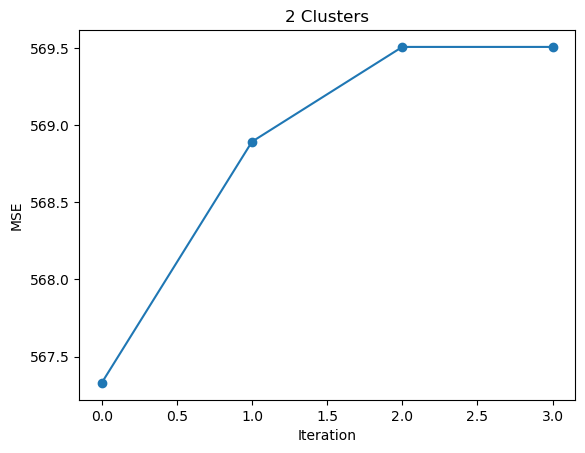

MSE for 2 clusters: 569.506

0
1
2
3
4
CONVERGENCE ACHEIVED


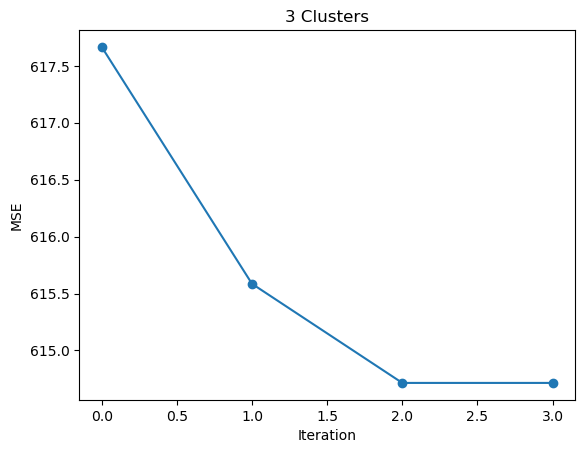

MSE for 3 clusters: 614.714

0
1
2
3
CONVERGENCE ACHEIVED


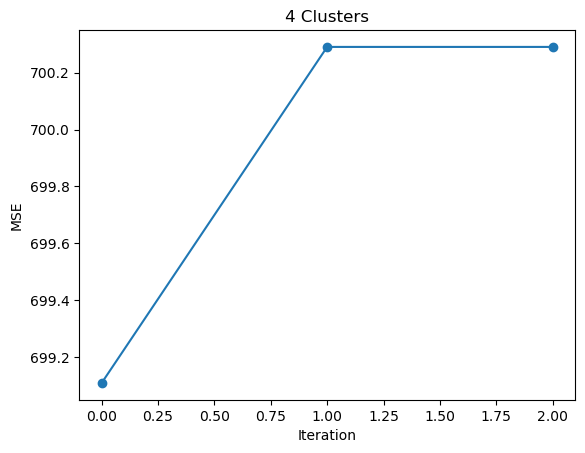

MSE for 4 clusters: 700.29

0
1
2
3
4
5
6
7
8
9
10
11
CONVERGENCE ACHEIVED


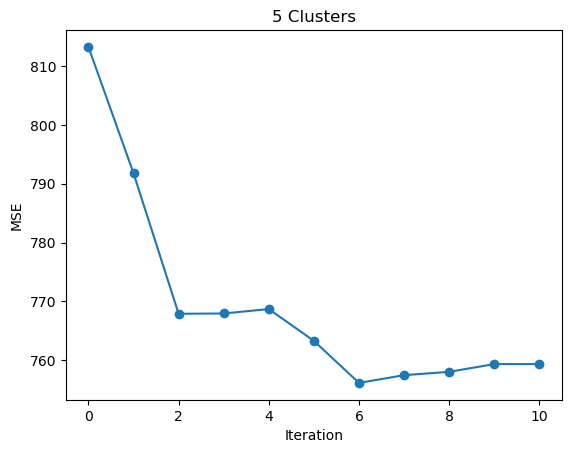

MSE for 5 clusters: 759.334

0
1
2
3
4
5
6
CONVERGENCE ACHEIVED


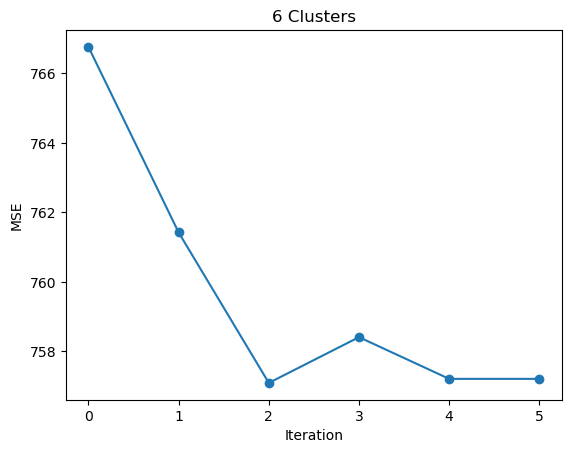

MSE for 6 clusters: 757.209

0
1
2
3
4
5
6
7
CONVERGENCE ACHEIVED


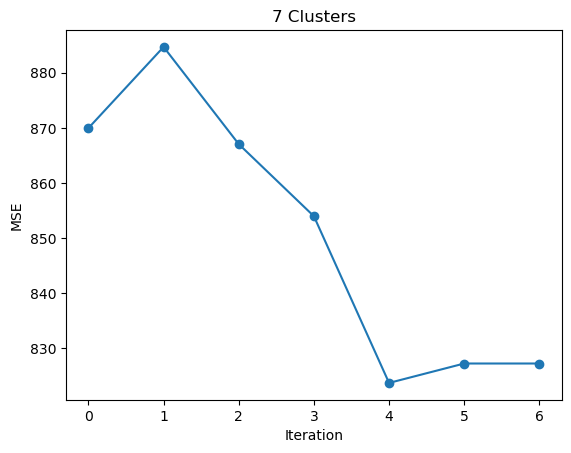

MSE for 7 clusters: 827.248

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
CONVERGENCE ACHEIVED


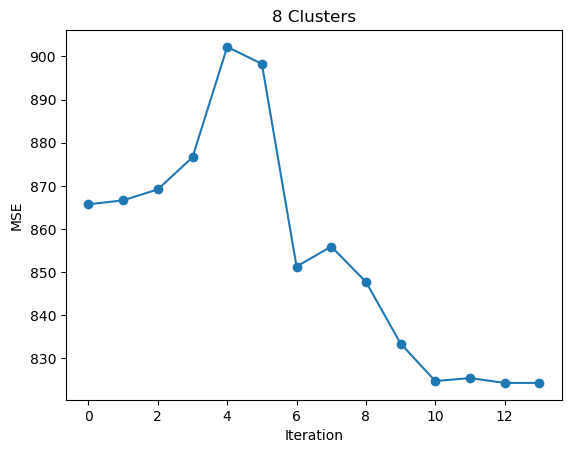

MSE for 8 clusters: 824.331

0
1
2
3
4
5
6
7
8
9
CONVERGENCE ACHEIVED


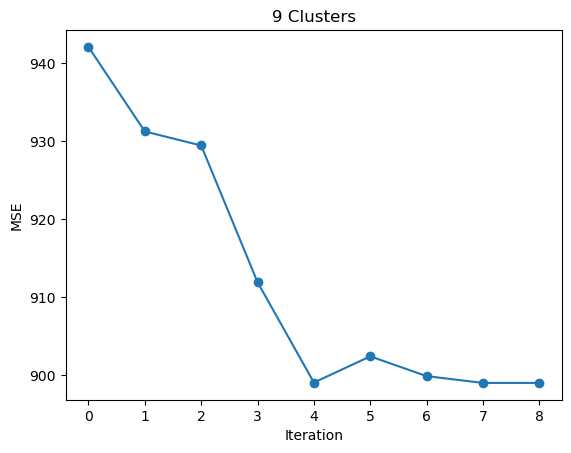

MSE for 9 clusters: 898.989



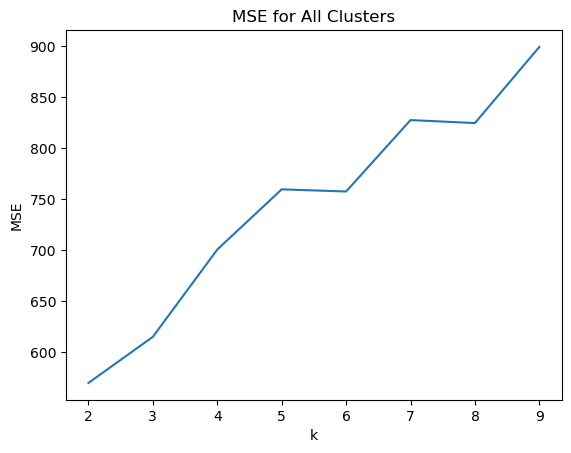

In [32]:
# Call the function with specified parameters
k_means_compare(10, 100, 0.01)

It looks like 2 clusters is the best:

In [33]:
# Initialize and fit the KMeansClustering model
kmeans = KMeansClustering(num_clusters=2)

kmeans.fit(X)

# Get the final centroids
final_centroids = kmeans.final_centroids
print("Final Centroids:")
print(final_centroids)

# Predict the cluster labels for the data
cluster_labels = kmeans.predict(X)
print("Cluster Labels:")
print(cluster_labels)

# Calculate the mean squared error for the final clusters
mse = kmeans.mean_squared_error()
print("Mean Squared Error:", mse)

0
1
CONVERGENCE ACHEIVED
Final Centroids:
[array([36.11214953, 14.85981308, 40.79439252]), array([92.16901408, 27.94366197, 25.18309859])]
Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]
Mean Squared Error: 569.5061322727918


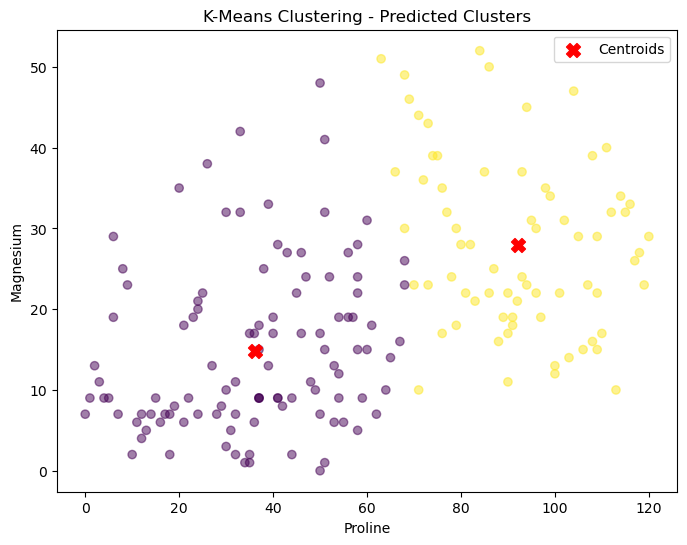

In [34]:
# Convert final centroids to a NumPy array
final_centroids = np.array(final_centroids)

# Plot the data points with colors representing the predicted clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.title('K-Means Clustering - Predicted Clusters')
plt.xlabel('Proline')
plt.ylabel('Magnesium')
plt.legend()
plt.show()

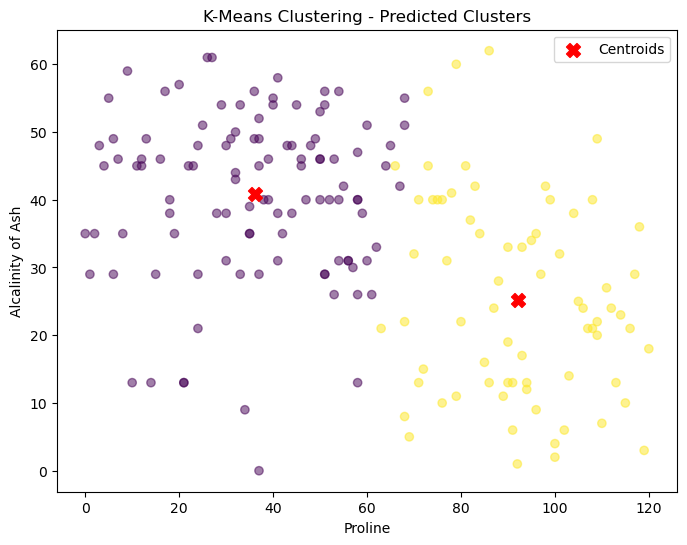

In [35]:
# Convert final centroids to a NumPy array
final_centroids = np.array(final_centroids)

# Plot the data points with colors representing the predicted clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 2], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(final_centroids[:, 0], final_centroids[:, 2], marker='X', color='red', s=100, label='Centroids')
plt.title('K-Means Clustering - Predicted Clusters')
plt.xlabel('Proline')
plt.ylabel('Alcalinity of Ash')
plt.legend()
plt.show()

# Now Implement with Sklearn's package

In [36]:
#preprocessing 

#selecting features
X = np.asarray(encoded_df[['Proline', 'Magnesium', 'Alcalinity_of_ash']])
y = np.asarray(encoded_df['class'])

#Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 90)

In [46]:
# Start timing the training process
start_time = time.time()

# Initialize the KMeans clustering model with 3 clusters and a random state of 80
kmeans_model = KMeans(n_clusters=3, random_state=80)

# Fit the KMeans model to the training data
kmeans_model.fit(X_train, y_train)

# End timing the training process
end_time = time.time()

# Calculate the time taken for training
training_time = end_time - start_time

# Print the training time
print('Training Time of K-Means Clustering:', training_time)

# Predict the cluster labels for the test data
y_pred_kmeans = kmeans_model.predict(X_test)

Training Time of K-Means Clustering: 0.006266117095947266


In [47]:
# Create a list to store the weighted cluster sum of squares
wcss_values = []

# Iterate over different numbers of clusters from 1 to 9
for num_clusters in range(1, 10):
    # Initialize the KMeans model with the current number of clusters
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=80)
    
    # Fit the KMeans model to the training data
    kmeans_model.fit(X_train)
    
    # Append the inertia (weighted sum of squared distances to the nearest centroid) to the list
    wcss_values.append(kmeans_model.inertia_)

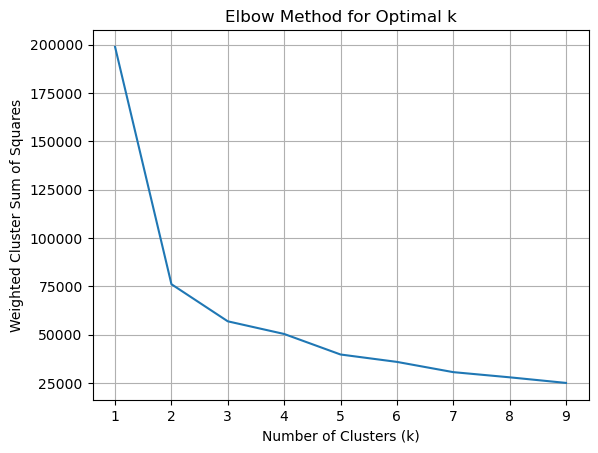

In [48]:
# Visualize the sum of squares for a variety of k values to assess which k is best
plt.plot(range(1, 10), wcss_values)
plt.xticks(range(1, 10))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Weighted Cluster Sum of Squares')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
This confirms 2 t